# Breast cancer prediction

## Introduction

## Import libraries

In [123]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import sklearn
from sklearn.manifold import TSNE
from sklearn import ensemble
import kmapper as km
import seaborn as sns
import time

%matplotlib inline

## Load data

In [70]:
# Load the Census dataset
bcancer_df = pd.read_csv("data.csv")

## Initial data exploration

In [71]:
# For reproducability of the results
np.random.seed(42)
# Observe first few rows
bcancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [72]:
bcancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [73]:
bcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## Clean data

In [74]:
# Encode the 'diagnosis' feature to numerical values
bcancer_clean_df = bcancer_df.replace(['B', 'M'], [0, 1])

In [75]:
# Remove last column 
bcancer_clean_df = bcancer_clean_df.drop(bcancer_df.columns[len(bcancer_df.columns)-1], axis=1)
# Remove id column
bcancer_clean_df = bcancer_clean_df.drop(['id'], axis=1)
# Show first few rows
bcancer_clean_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
#bcancer_clean_df.columns

## Further data exploration

### Compare distribution of values for each feature between benign & malignent tumor sub-groups

In [76]:
# Split dataset into those with malignent and those with benign tumors
malignent_df = bcancer_clean_df[bcancer_clean_df['diagnosis']==1]
benign_df = bcancer_clean_df[bcancer_clean_df['diagnosis']==0]

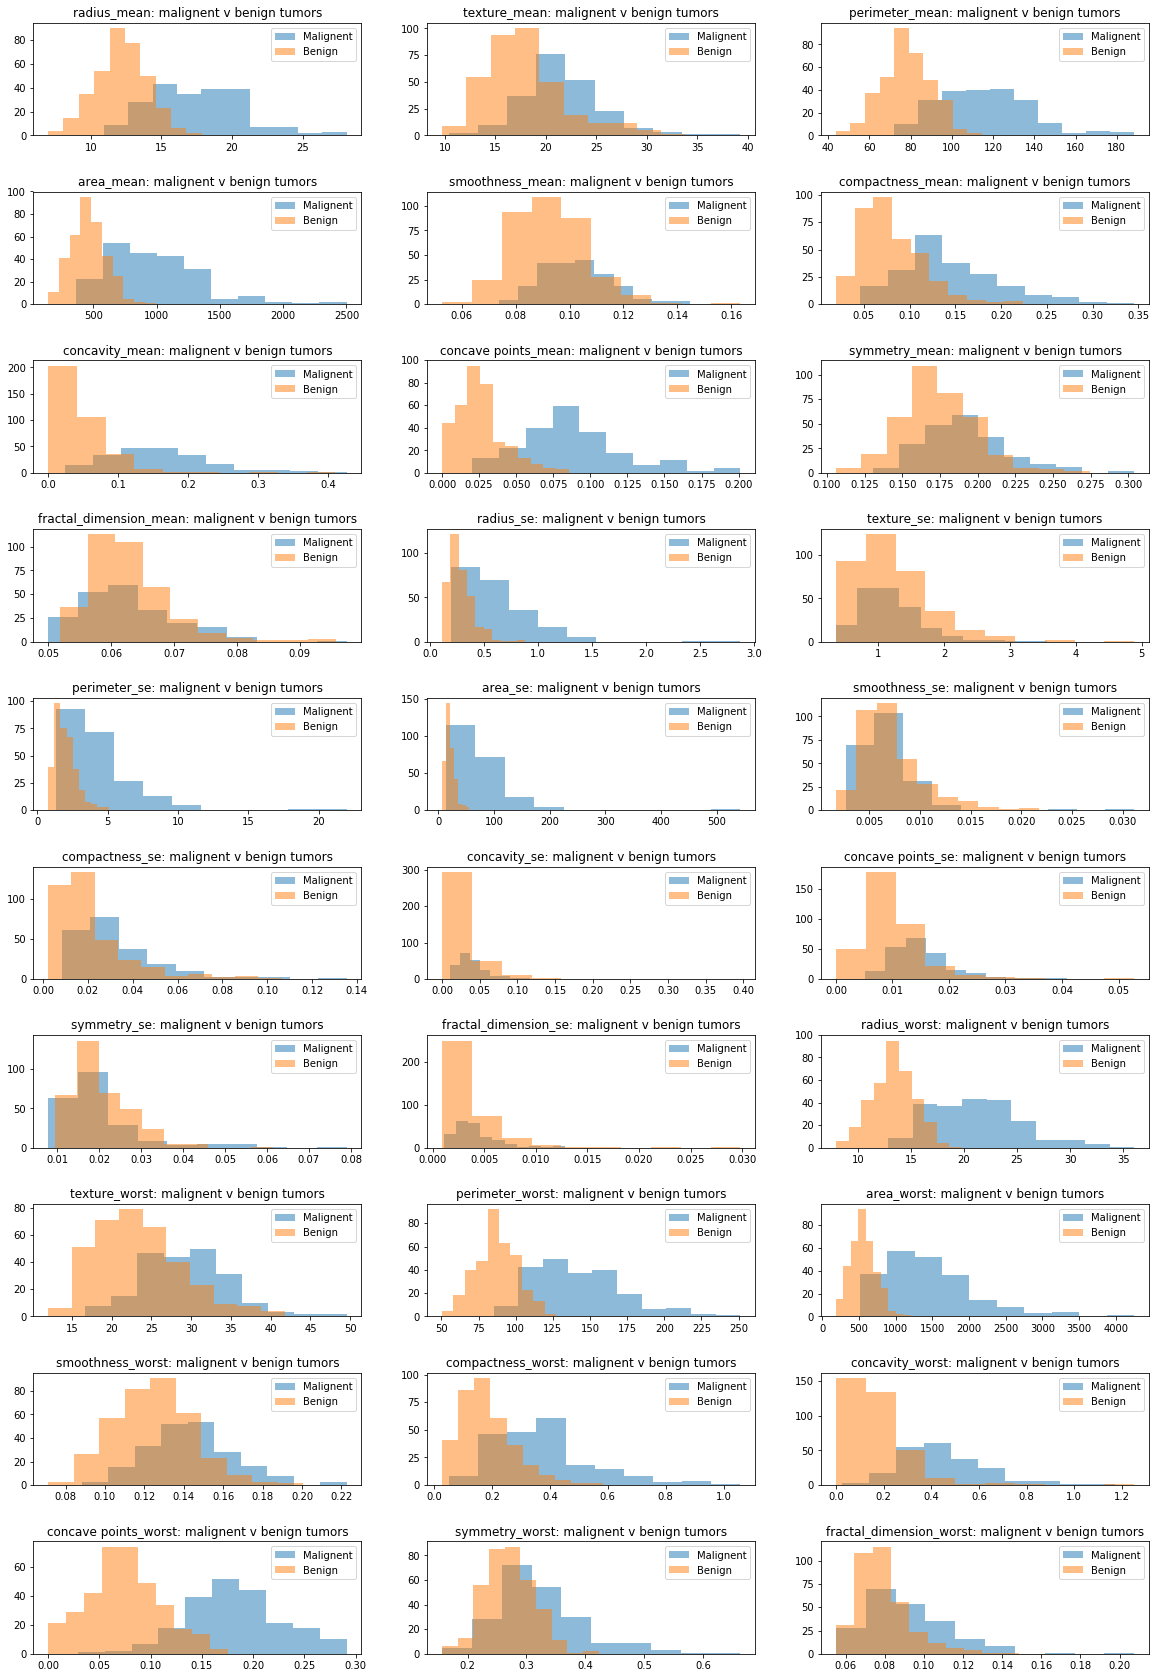

In [101]:
# Function for plotting feature distributions to compare benign & malignent sub-groups
def compare_features_benign_malignent(features, malignent_df, benign_df):
    
    # Define constants
    bins = 10
    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20,30))
    fig.subplots_adjust(hspace=0.5)
    # For each axes & feature
    for index, (ax, feature) in enumerate(zip(axes.flatten(), features)):
        
        ax.hist(malignent_df[feature], bins, alpha=0.5, label='Malignent')
        ax.hist(benign_df[feature], bins, alpha=0.5, label='Benign')
        ax.legend(loc='upper right')
        ax.set_title(feature + ": malignent v benign tumors")        

# Get feature names (remove first element diagnosis which is target feature)
features = bcancer_clean_df.columns
features = features[1:]
# Plot feature distributions to compare benign & malignent sub-groups
compare_features_benign_malignent(features, malignent_df, benign_df)

### Dimensionality reduction using t-SNE and comparing cancer sub-groups

In [105]:
# Create 2 components using t-SNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(bcancer_clean_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.008s...
[t-SNE] Computed neighbors for 569 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679842
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.290382
[t-SNE] KL divergence after 300 iterations: 0.274604
t-SNE done! Time elapsed: 1.104259967803955 seconds


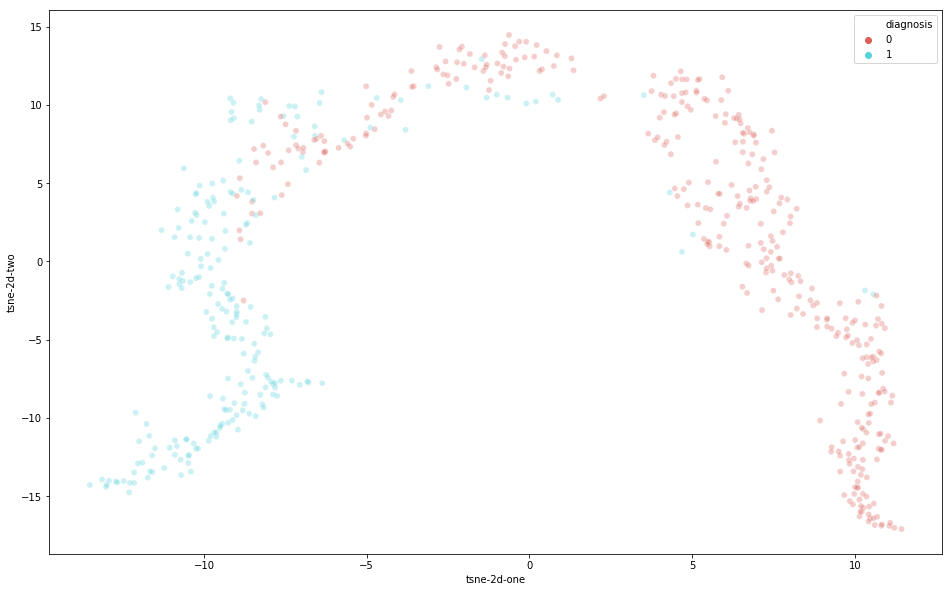

In [107]:
# Plot dataset with 2 t-SNE features, using same colour for data for benign v malignent tumors
bcancer_clean_df['tsne-2d-one'] = tsne_results[:,0]
bcancer_clean_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="diagnosis",
    palette=sns.color_palette("hls", 2),
    data=bcancer_clean_df,
    legend="full",
    alpha=0.3
)

In [108]:
# Create 3 components using t-SNE
time_start = time.time()
tsne2 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results2 = tsne2.fit_transform(bcancer_clean_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 27.543732
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.584457
[t-SNE] KL divergence after 300 iterations: 1.059766
t-SNE done! Time elapsed: 3.298301935195923 seconds


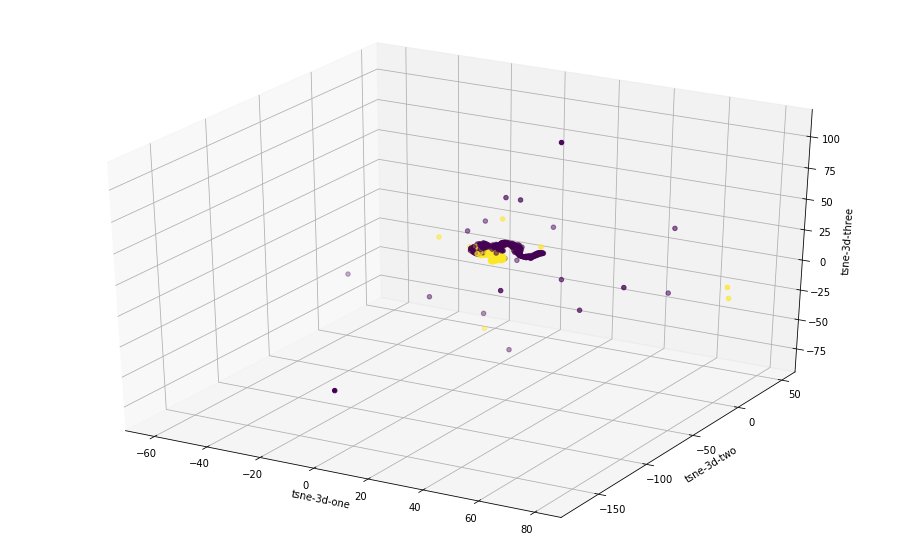

In [120]:
bcancer_clean_df['tsne-3d-one'] = tsne_results2[:,0]
bcancer_clean_df['tsne-3d-two'] = tsne_results2[:,1]
bcancer_clean_df['tsne-3d-three'] = tsne_results2[:,2]
# Plot dataset with 3 t-SNE, using same colour for data for benign v malignent tumors
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=bcancer_clean_df["tsne-3d-one"], 
    ys=bcancer_clean_df["tsne-3d-two"], 
    zs=bcancer_clean_df["tsne-3d-three"], 
    c=bcancer_clean_df["diagnosis"].astype(int)
)
ax.set_xlabel('tsne-3d-one')
ax.set_ylabel('tsne-3d-two')
ax.set_zlabel('tsne-3d-three')
plt.show()

### Topological data analysis comparing cancer sub-groups

In [124]:
# Create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(bcancer_clean_df[features])
lens1 = model.decision_function(bcancer_clean_df[features]).reshape((bcancer_clean_df[features].shape[0], 1))

# Create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=0)
lens2 = mapper.fit_transform(bcancer_clean_df[features], projection="l2norm")

# Combine lenses pairwise to get a 2-D lens i.e. [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Define the simplicial complex
graph = mapper.map(lens,
                      bcancer_clean_df[features],
                      nr_cubes=15,
                      overlap_perc=0.7,
                      clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                       random_state=3471))

# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
# Tooltips with the target diagnosis (malignent v benign) for every cluster member
mapper.visualize(graph,
                 title="Topological network of breast cancer data",
                 path_html="tda_breast_cancer.html",
                 color_function=bcancer_clean_df['diagnosis'].values,
                 custom_tooltips=bcancer_clean_df['diagnosis'].values)

/Users/Pranath/.pyenv/versions/3.5.4/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/Pranath/.pyenv/versions/3.5.4/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Topological network of breast cancer data | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transfo

![title](img/tda_breast_cancer1.png)

![title](img/tda_breast_cancer2.png)

## Prepare data for ML model

## Methodology

## ML model development

## ML model evaluation

## Conclusion